In [1]:
using Distributions
using StatsBase
using PythonPlot
using DataFrames
using Optim
using NLsolve
using Setfield
using CSV
using LinearAlgebra
using ProgressBars
include("estimators.jl")
include("rem_theory.jl")
include("models.jl")

FIG_PATH = "/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

"/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

# WIP

"1"

In [249]:
θ = (b = [1.0; 0.0;;], v = [0.1;;]);
Ltrue = 2log(2)/(1+sqrt(1-2log(2)*θ.v[1]))

m_reps =5
L = 100
M = 5000

ar1s = []
for i in ProgressBar(1:m_reps)
    times = runar([0],θ,M*L)
    n = vcat([collect(1:L) for k in 1:M]...) .-1;
    lineages = vcat([ones(L)*k for k in 1:M]...);
    ar1 = DataFrame((lineage=lineages,gt = times[:,1],t=cumsum( times[:,1]),n=n));
    ar1[:,:rep] = i*ones(length(times))
    ar1.t = vcat([ar1[ar1.lineage .==l,:t] .- ar1[ar1.lineage .==l,:t][1] for l in unique(ar1.lineage)]...);
    push!(ar1s,ar1)
end



0.0%┣                                                ┫ 0/5 [00:00<00:00, -0s/it]
20.0%┣████████▋                                  ┫ 1/5 [00:02<Inf:Inf, InfGs/it]
40.0%┣███████████████████▏                            ┫ 2/5 [00:03<00:09, 3s/it]
60.0%┣████████████████████████████▉                   ┫ 3/5 [00:04<00:04, 2s/it]
80.0%┣██████████████████████████████████████▍         ┫ 4/5 [00:05<00:02, 2s/it]
100.0%┣███████████████████████████████████████████████┫ 5/5 [00:07<00:00, 2s/it]
100.0%┣███████████████████████████████████████████████┫ 5/5 [00:07<00:00, 2s/it]


In [245]:


n_range = 3:2:L
Mmax = 4


Λt = mean(hcat([[FDE(ar1s[j][ar1s[j].n .== k,:t],k) for j in 1:m_reps] for k in n_range]...),dims=1)';
Λ_FDE = hcat([[FDE(ar1s[j][(ar1s[j].n .== k) .& (ar1s[j].lineage .< Mmax),:t],k-1) for j in 1:m_reps] for k in n_range]...)
Λ_FTE = hcat([[FTE(ar1s[j][(ar1s[j].t .< t) .& (ar1s[j].lineage .< Mmax),:n],1.0 .*t) for j in 1:m_reps] for t in n_range]...)

5×49 Matrix{Float64}:
 0.63539   0.503539  0.547793  0.509702  …  0.667383  0.667703  0.657795
 0.585953  0.549774  0.547793  0.553788     0.670883  0.664056  0.653957
 0.63539   0.573864  0.564713  0.509702     0.639762  0.640643  0.643997
 0.513482  0.549774  0.573489  0.574716     0.682137  0.672409  0.660633
 0.726177  0.636589  0.593516  0.588083     0.65995   0.665636  0.656984

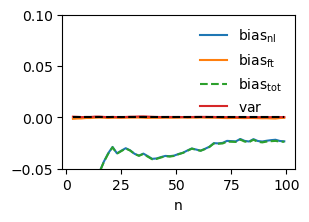

In [246]:



#Λt = [FDE(ar1_big[ar1_big.n .== k,:t],k) for k in n_range]

var_FDE = var(Λ_FDE,dims=1)[1,:]
nl_FDE = mean(Λ_FDE,dims=1)[1,:] .- Λt[:,1]
ft_FDE = Λt[:,1] .- Ltrue

fig, ax = subplots(figsize=(3,2))


# ax.fill_between(n_range,zeros(length(P1)),P1)
# ax.fill_between(n_range,P1,P1 .+ P2)
# ax.fill_between(n_range,P1 .+ P2,P1 .+ P2 .+ P3)
#ax.fill_between(n_range,P1 .+ P2 .+ P3,P2 .+ P3 .+ P4)
# ax.fill_between(n_range,zeros(length(P1[1:,1])),P1[1,:])
ax.plot(n_range,nl_FDE,"-",label=L"${\rm bias}_{\rm nl}$")
ax.plot(n_range,ft_FDE,"-",label=L"${\rm bias}_{\rm ft}$")
ax.plot(n_range,ft_FDE .+ nl_FDE,"--",label=L"${\rm bias}_{\rm tot}$")
ax.plot(n_range,var_FDE,"-",label=L"${\rm var}$")
ax.plot(n_range,zeros(length(n_range)),"k--")
ax.legend(frameon=false)
ax.set_xlabel("n")
ax.set_ylim([-0.05,0.1])
fig